In [474]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.optimize as spy
%matplotlib inline

## Part a

In [475]:
num_agents = 500; # number of members partaking in transactions
m0 = 1000; # average money per agent, will also be the starting money
beta = 1/m0 # equation variable
money_tot = m0 * num_agents # total money, will be conserved

In [476]:
# transaction quantification value epsilon
def epsilon():
    return np.round(np.random.uniform(0,1),2)

# used to asign transactions between two random agents
def rand_agent():
    return np.int(np.round(np.random.uniform(0,num_agents - 1),0))

In [523]:
# vector container for all agents with starting money, m0
def agent():
    agents = np.zeros(num_agents);
    agents += m0;
    return agents

In [545]:
def transactions(agents,num):
    i = 0
    while i < num:
        #exchange quantifier and agent identification
        ep = epsilon()
        one = rand_agent()
        two = rand_agent()
        if one == two:
            two = rand_agent()
        
        #perform transaction
        Mone = agents[one]
        Mtwo = agents[two]
        Msum = Mone + Mtwo
        Moneprime = ep * Msum
        #Mtwoprime = (1 - ep) * Msum 
        Mtwoprime = Msum - Moneprime
        
        #update agent wealth
        agents[one] = Moneprime
        agents[two] = Mtwoprime
        
        i += 1

In [628]:
def history(vector, num):
    wealth = vector
    plt.figure('histogram')
    n, bins, patches = plt.hist(vector, 50, alpha=0.5)
    n = np.append(n,0)
    plt.title('Wealth Distribution after: ' + str(num) + ' transactions')
    plt.xlabel('Wealth [Dollars]')
    plt.ylabel('Occurance')
    hold = True
    y = np.exp(-beta*bins) * np.max(n)
    plt.plot(bins,y, 'r')
    plt.show()
    print(len(n),len(bins))
    return n, bins

In [565]:
def repitition(num):
    rep = 0
    loss = 0
    vector = agent()
    while np.abs(loss) < 1:
        transactions(vector,num)
        money_after = sum(vector)
        loss = money_tot - money_after
        rep += 1
        agents = vector
    print('money is not being conserved')
    print('net difference: ', loss)
    print('rep count: ', rep)
    return agents

Num represents the number of transactions that will occur in each simulation

the repitition function performs a num of transactions between the same num_agents until a change in the systems net money occurs. 

A histogram of the last stable system is plotted with an overlay of the gibs distribution in red

money is not being conserved
net difference:  -730.742964514
rep count:  27


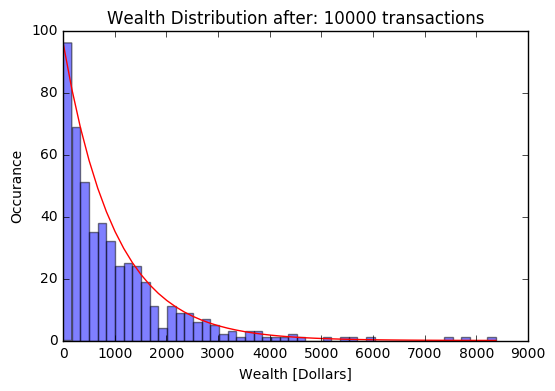

51 51


In [629]:
num = 10**4
agents = repitition(num)
n, bins = history(agents,num)

## Part b

n = A * exp(-beta*bins)

ln n = ln A - beta * bins

A = 10 * beta * |bins - max(bins)|

ln n/A = -beta * bins = ln n/max(n)

In [643]:
[[a,b],c] = spy.curve_fit(lambda m,a,b: a-b*m, bins, n)

C:\Users\samme\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


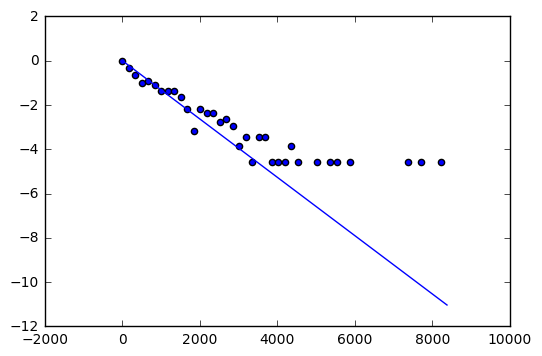

In [651]:
plt.figure('log')
plt.scatter(bins,np.log(n/np.max(n)))
hold = True
plt.plot(bins,- b * bins/4)

need to go through n and find the 0's then match the corresponding bins and delete those as well